In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [5]:
# Define folder paths to your 10x Genomics data
folder1 <- "/tmp/test/BD_Rhapsody_expression/"
folder2 <- "/tmp/test3/BD_Rhapsody_expression/"

# Read the 10x data into Seurat objects
seurat1 <- Read10X(folder1)
seurat2 <- Read10X(folder2)

In [6]:
# Create Seurat objects
seurat_obj1 <- CreateSeuratObject(counts = seurat1)
seurat_obj2 <- CreateSeuratObject(counts = seurat2)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”


In [7]:
# Find common genes and barcodes
common_genes <- intersect(rownames(seurat_obj1), rownames(seurat_obj2))
common_barcodes <- intersect(colnames(seurat_obj1), colnames(seurat_obj2))

In [8]:
seurat_obj1

An object of class Seurat 
48 features across 24039 samples within 1 assay 
Active assay: RNA (48 features, 0 variable features)
 1 layer present: counts

In [9]:
seurat_obj2

An object of class Seurat 
48 features across 136545 samples within 1 assay 
Active assay: RNA (48 features, 0 variable features)
 1 layer present: counts

In [10]:
diff_genes = setdiff(rownames(seurat_obj1), rownames(seurat_obj2))
print( "genes in 1 and not 2" )
diff_genes

[1] "genes in 1 and not 2"


[1] "Igkv8-24-unspliced"

In [11]:
diff_genes = setdiff(rownames(seurat_obj2), rownames(seurat_obj1))
print( "genes in 2 and not 1" )
diff_genes

[1] "genes in 2 and not 1"


[1] "SampleTag01-mm-stAbO-ext"

In [12]:
diff_cells = setdiff(colnames(seurat_obj1), colnames(seurat_obj2))
print( "cells in 1 and not 2" )
diff_cells

[1] "cells in 1 and not 2"


[1] "Cell7887037"  "Cell16052169" "Cell16321180" "Cell16664388" "Cell19435707"
 [6] "Cell21347465" "Cell21425127" "Cell23333719" "Cell23677553" "Cell25552901"
[11] "Cell27008414" "Cell28790135" "Cell31482329" "Cell32458836" "Cell39276394"
[16] "Cell39719497" "Cell43106066" "Cell44751218" "Cell48130124" "Cell50969299"
[21] "Cell51875952" "Cell51963826" "Cell52230387"

In [13]:
diff_cells = setdiff(colnames(seurat_obj2), colnames(seurat_obj1))
print( "cells in 2 and not 1" )
diff_cells

[1] "cells in 2 and not 1"


[1] "Cell16"       "Cell1622"     "Cell2275"     "Cell2567"    
    [5] "Cell3051"     "Cell3475"     "Cell4062"     "Cell4291"    
    [9] "Cell4401"     "Cell4481"     "Cell4879"     "Cell5359"    
   [13] "Cell6050"     "Cell6188"     "Cell6518"     "Cell7036"    
   [17] "Cell7145"     "Cell7253"     "Cell7568"     "Cell8868"    
   [21] "Cell8896"     "Cell9053"     "Cell9251"     "Cell9375"    
   [25] "Cell9445"     "Cell9493"     "Cell9896"     "Cell10018"   
   [29] "Cell10693"    "Cell11131"    "Cell11707"    "Cell12097"   
   [33] "Cell13699"    "Cell13912"    "Cell14121"    "Cell15103"   
   [37] "Cell15131"    "Cell15412"    "Cell15666"    "Cell16209"   
   [41] "Cell16552"    "Cell16876"    "Cell17337"    "Cell17501"   
   [45] "Cell18112"    "Cell18747"    "Cell19141"    "Cell19350"   
   [49] "Cell19569"    "Cell19742"    "Cell19889"    "Cell21053"   
   [53] "Cell21321"    "Cell22203"    "Cell23393"    "Cell23695"   
   [57] "Cell23864"    "Cell24585"    "Cell25123"    "Cell25939"   
   [61] "Cell26513"    "Cell26683"    "Cell26841"    "Cell27218"   
   [65] "Cell27219"    "Cell27528"    "Cell27823"    "Cell28426"   
   [69] "Cell28490"    "Cell30642"    "Cell31806"    "Cell32050"   
   [73] "Cell32205"    "Cell32243"    "Cell33326"    "Cell33625"   
   [77] "Cell34235"    "Cell34321"    "Cell34937"    "Cell36782"   
   [81] "Cell37722"    "Cell37741"    "Cell39499"    "Cell39580"   
   [85] "Cell39781"    "Cell39900"    "Cell40394"    "Cell40719"   
   [89] "Cell40747"    "Cell40845"    "Cell40964"    "Cell41981"   
   [93] "Cell42397"    "Cell42694"    "Cell42860"    "Cell43880"   
   [97] "Cell44149"    "Cell44955"    "Cell45458"    "Cell45582"   
  [101] "Cell45729"    "Cell46152"    "Cell46263"    "Cell46581"   
  [105] "Cell46962"    "Cell47025"    "Cell47056"    "Cell47123"   
  [109] "Cell47271"    "Cell47601"    "Cell47722"    "Cell47910"   
  [113] "Cell48750"    "Cell49218"    "Cell49848"    "Cell50817"   
  [117] "Cell51542"    "Cell52541"    "Cell53191"    "Cell53381"   
  [121] "Cell54929"    "Cell55051"    "Cell56746"    "Cell57545"   
  [125] "Cell57796"    "Cell58350"    "Cell58759"    "Cell58768"   
  [129] "Cell58902"    "Cell60035"    "Cell61874"    "Cell62287"   
  [133] "Cell62804"    "Cell63161"    "Cell63779"    "Cell63942"   
  [137] "Cell63990"    "Cell64436"    "Cell65344"    "Cell66247"   
  [141] "Cell66617"    "Cell66650"    "Cell67065"    "Cell67086"   
  [145] "Cell67317"    "Cell67369"    "Cell67858"    "Cell68112"   
  [149] "Cell68870"    "Cell69231"    "Cell69246"    "Cell69348"   
  [153] "Cell69401"    "Cell69986"    "Cell71403"    "Cell71659"   
  [157] "Cell71893"    "Cell73055"    "Cell73201"    "Cell74141"   
  [161] "Cell75132"    "Cell75903"    "Cell76099"    "Cell76145"   
  [165] "Cell76597"    "Cell76715"    "Cell77415"    "Cell78676"   
  [169] "Cell78802"    "Cell79099"    "Cell79870"    "Cell81523"   
  [173] "Cell83000"    "Cell83542"    "Cell83979"    "Cell84915"   
  [177] "Cell84968"    "Cell85382"    "Cell85548"    "Cell86148"   
  [181] "Cell86170"    "Cell86367"    "Cell87108"    "Cell87152"   
  [185] "Cell87536"    "Cell87926"    "Cell87979"    "Cell88525"   
  [189] "Cell89049"    "Cell89125"    "Cell90704"    "Cell91100"   
  [193] "Cell91623"    "Cell91774"    "Cell92004"    "Cell92323"   
  [197] "Cell92522"    "Cell92954"    "Cell93931"    "Cell94096"   
  [201] "Cell94211"    "Cell94497"    "Cell95586"    "Cell96096"   
  [205] "Cell96463"    "Cell96469"    "Cell96809"    "Cell97282"   
  [209] "Cell97366"    "Cell97870"    "Cell98283"    "Cell98456"   
  [213] "Cell98953"    "Cell100420"   "Cell100431"   "Cell100591"  
  [217] "Cell100592"   "Cell100695"   "Cell101005"   "Cell101471"  
  [221] "Cell101886"   "Cell102595"   "Cell102708"   "Cell103198"  
  [225] "Cell103330"   "Cell103545"   "Cell104035"   "Cell104136"  
  [229] "Cell104947"   "Cell104974"   "Cell105037"   "Cell105044"  
  [233] "Cell105416"   "Cell105503"   "Cell105715"   "Cell10

In [14]:
rowSums(GetAssayData(seurat_obj2, layer = "counts"))

SampleTag01-mm-stAbO-ext            Igkv3-2-unspliced 
                     2368055                            2 
ENSMUSG00000119951-unspliced           Igkv3-12-unspliced 
                           6                            2 
           Igkv3-3-unspliced            Igkv3-7-unspliced 
                           1                            2 
                    Igkv3-10                      Igkv3-7 
                           1                            4 
                       Igkj5                     Igkv8-26 
                         293                            1 
             Igkj2-unspliced            Igkv3-4-unspliced 
                         254                            2 
          Igkv3-10-unspliced                      Igkv3-5 
                           2                            5 
          Igkv8-16-unspliced                      Igkv3-6 
                           2                            1 
           Gm30211-unspliced                     Igkv8-16 
                         483                            1 
             Igkj5-unspliced           Igkv6-17-unspliced 
                         140                           16 
          Igkv6-13-unspliced           Igkv6-23-unspliced 
                           5                            1 
                     Gm30211                     Igkv6-25 
                         105                            4 
          Igkv6-25-unspliced                      Igkv3-3 
                          30                            1 
                       Igkj4                         Igkc 
                         290                        41264 
             Igkj4-unspliced            Igkv3-1-unspliced 
                         260                            2 
ENSMUSG00000120845-unspliced                      Gm42720 
                           1                            1 
                    Igkv6-13              Igkj1-unspliced 
                           2                          272 
              Igkc-unspliced                      Gm10360 
                        2549                            1 
          ENSMUSG00000119951              Igkj3-unspliced 
                           1                            1 
                       Igkj1                     Igkv3-11 
                         653                            3 
                     Igkv3-1                   Igkv3-12-1 
                          14                            1 
          Igkv8-18-unspliced                        Igkj2 
                           1                          531 
                     Igkv3-2                      Igkv3-4 
                           3                           10 
                    Igkv6-14                     Igkv6-17 
                           1                            3

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


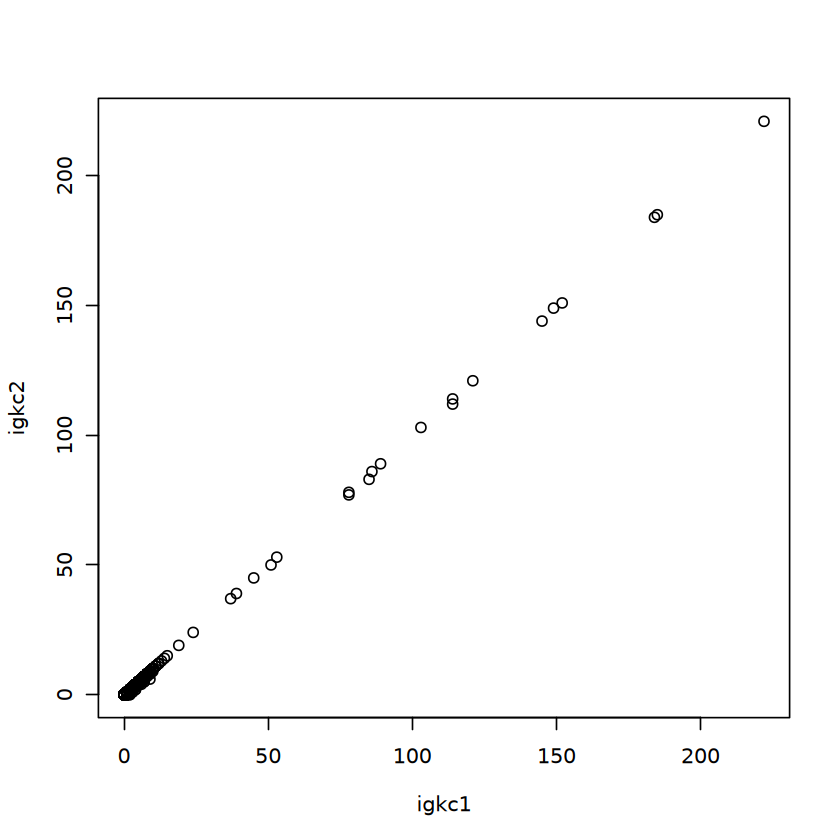

In [15]:
igkc1 <- GetAssayData(seurat_obj1[,common_barcodes], slot = "counts")["Igkc", ]   # For folder1
igkc2 <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Igkc", ]   # For folder2

plot(igkc1, igkc2 )

In [16]:
match ( diff_genes , rownames(seurat_obj1))

[1] NA

In [17]:
match ( diff_genes , rownames(seurat_obj2))

[1] 1

In [18]:
diff_cells = setdiff(colnames(seurat_obj1), colnames(seurat_obj2))
diff_cells

[1] "Cell7887037"  "Cell16052169" "Cell16321180" "Cell16664388" "Cell19435707"
 [6] "Cell21347465" "Cell21425127" "Cell23333719" "Cell23677553" "Cell25552901"
[11] "Cell27008414" "Cell28790135" "Cell31482329" "Cell32458836" "Cell39276394"
[16] "Cell39719497" "Cell43106066" "Cell44751218" "Cell48130124" "Cell50969299"
[21] "Cell51875952" "Cell51963826" "Cell52230387"

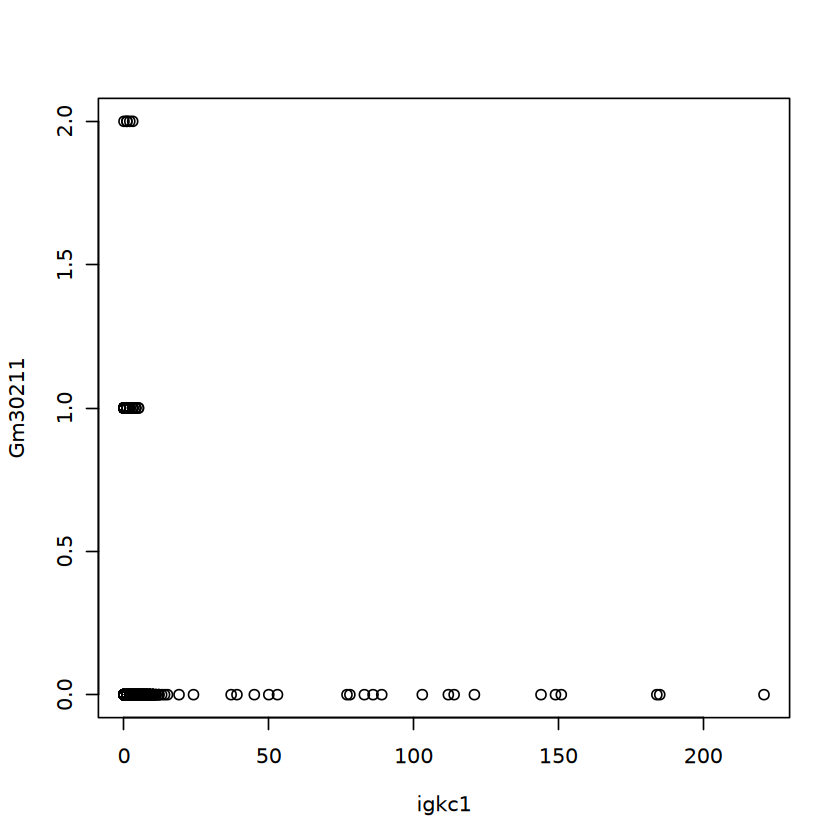

In [20]:
igkc1 <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Igkc", ]   # For folder1
Gm30211 <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Gm30211", ]   # For folder2

plot(igkc1, Gm30211 )

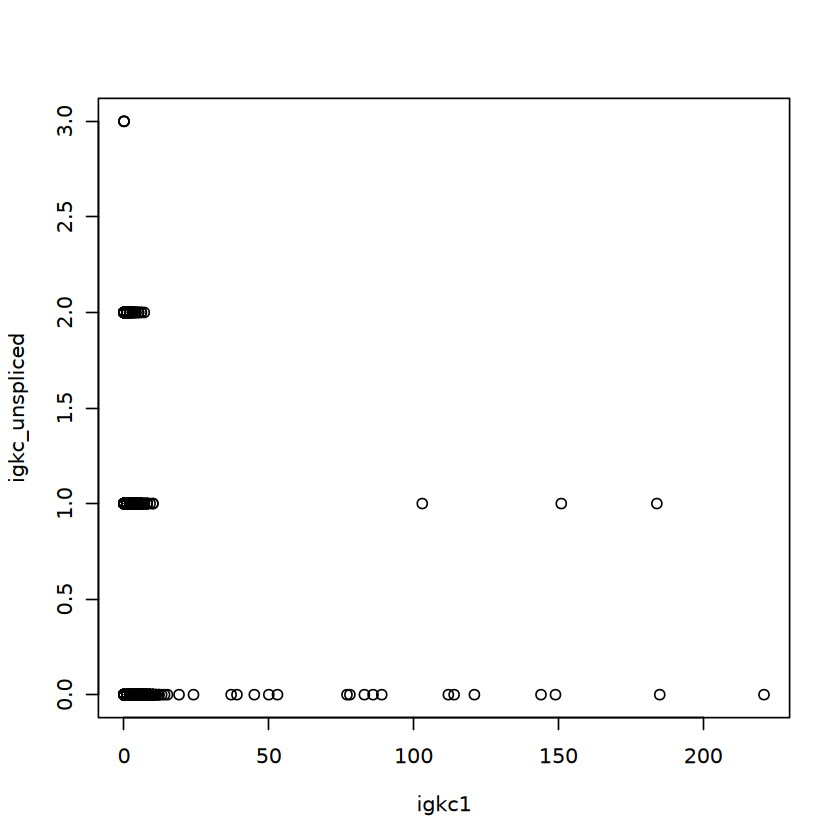

In [23]:
igkc1 <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Igkc", ]   # For folder1
igkc_unspliced <- GetAssayData(seurat_obj2[,common_barcodes], slot = "counts")["Igkc-unspliced", ]   # For folder2

plot(igkc1, igkc_unspliced )

In [16]:
common_genes

[1] "Igkv8-16"                     "Igkj5-unspliced"             
 [3] "Igkv6-17"                     "Gm30211-unspliced"           
 [5] "Igkc"                         "Igkj4"                       
 [7] "Igkv3-10"                     "Igkv6-13"                    
 [9] "ENSMUSG00000120845-unspliced" "Igkv3-12-1"                  
[11] "Igkv3-4-unspliced"            "Igkv6-25"                    
[13] "Igkv8-18-unspliced"           "Igkv3-3-unspliced"           
[15] "Igkc-unspliced"               "Igkv6-17-unspliced"          
[17] "Igkv3-7-unspliced"            "Igkj2-unspliced"             
[19] "Igkv3-2"                      "Igkj4-unspliced"             
[21] "Gm30211"                      "Igkj3-unspliced"             
[23] "Igkj2"                        "Igkv6-13-unspliced"          
[25] "Igkv3-12-unspliced"           "Igkv3-2-unspliced"           
[27] "Gm10360"                      "Igkv3-4"                     
[29] "Gm42720"                      "Igkj1"                       
[31] "Igkv3-6"                      "Igkv6-23-unspliced"          
[33] "Igkv8-16-unspliced"           "Igkv3-1"                     
[35] "Igkv3-3"                      "Igkv3-7"                     
[37] "Igkj5"                        "Igkv8-24-unspliced"          
[39] "Igkv8-26"                     "ENSMUSG00000119951"          
[41] "Igkv3-1-unspliced"            "Igkv3-11"                    
[43] "Igkj1-unspliced"              "Igkv3-10-unspliced"          
[45] "Igkv3-5"                      "Igkv6-14"                    
[47] "Igkv6-25-unspliced"           "ENSMUSG00000119951-unspliced"